# Community Structure

In this notebook, we examine how the progressive emergence of class separability is reflected in the emergence of community structure within the corresponding graph representations. We begin by importing the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.auto import tqdm
import sys
import os

sys.path.append(os.path.abspath('..'))
from datasets import DatasetFactory
from community_structure import CommunityStructure
from neural_networks import DNN
from helpers import train_model



device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


# 1. Syn-I Dataset

## 1.1 Modularity and Normalized Cut

In [ ]:
# Load datasets
X_train_circles, y_train_circles = DatasetFactory.make_circles(noise=0.03)
X_test_circles, y_test_circles = DatasetFactory.make_circles(noise=0.03)

# Calculate modularities and normalized cuts
modularities_circles = []
norm_cuts_circles = []
for k in tqdm(range(50)):
    # Initialize and train model
    model = DNN(input_dimension=2, hidden_units=25, depth=7)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_circles,
        y_train=y_train_circles,
        X_test=X_test_circles,
        y_test=y_test_circles,
        verbose=False
    )
    # Calculate modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_circles.append(community_strucutre.modularity(X=X_test_circles, y=y_test_circles,k=100))
    norm_cuts_circles.append(community_strucutre.normalized_cut(X=X_test_circles, y=y_test_circles, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [3]:
# Results for modularity
modularities_circles = np.array(modularities_circles)  
avg_modularities_circles = modularities_circles.mean(axis=0) 
print(avg_modularities_circles)

[0.04312376 0.05824434 0.24838761 0.47728537 0.49531459 0.4960671
 0.4959775  0.49597017 0.49682624]


In [4]:
# Results for normalized cuts
norm_cuts_circles = np.array(norm_cuts_circles)  
avg_norm_cuts_circles = norm_cuts_circles.mean(axis=0) 
print(avg_norm_cuts_circles)

[0.45683253 0.44164815 0.25091559 0.02259236 0.00464226 0.003721
 0.00359472 0.00365772 0.00294329]


## 1.2 Curvature Distribution

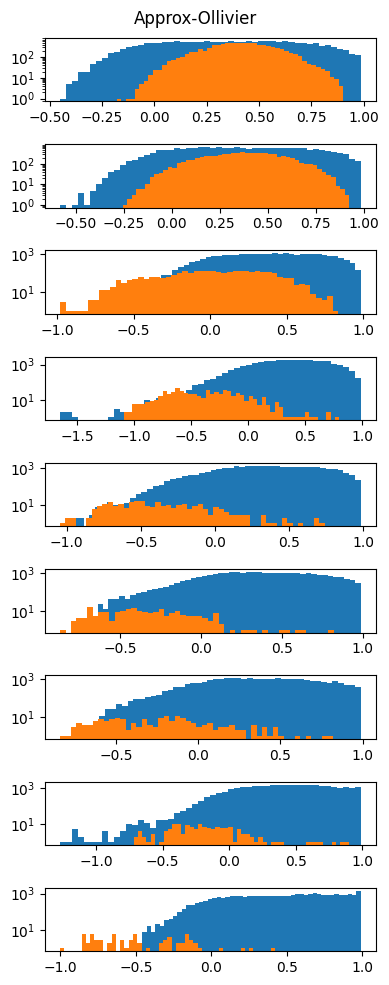

In [ ]:
# Calculate Ricci curvature distribution of inter- and intra-community edges
community_strucutre = CommunityStructure(NN=model)
ricci_curvs_within_forman, ricci_curvs_between_forman = community_strucutre.ricci_curvature_distribution(X=X_train_circles, y=y_train_circles, curv="Ollivier-Ricci", k=50)
plt.figure(figsize=(4,10))
plt.suptitle('Approx-Ollivier')
for i in range(len(ricci_curvs_between_forman)):
    plt.subplot(len(ricci_curvs_between_forman),1,i+1)
    plt.hist(ricci_curvs_within_forman[i], bins=50, log=True)
    plt.hist(ricci_curvs_between_forman[i], bins=50, log=True)
    #plt.xlim(-1.5,1)
plt.tight_layout()

### 1.3 Curvature Gap

In [ ]:
# Load datasets
X_train_circles, y_train_circles = DatasetFactory.make_circles(noise=0.03)
X_test_circles, y_test_circles = DatasetFactory.make_circles(noise=0.03)

# Train model
model = DNN(input_dimension=2, hidden_units=25, depth=7)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_circles,
    y_train=y_train_circles,
    X_test=X_test_circles,
    y_test=y_test_circles,
    verbose=False
)

# Calculate curvature gap
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_circles = community_strucutre.curvature_gap(X_test_circles, y_test_circles, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_circles

[np.float32(0.29183677),
 np.float32(0.41244513),
 np.float32(3.2839997),
 np.float32(2.8716156),
 np.float32(2.1732016),
 np.float32(1.4447757),
 np.float32(1.258146),
 np.float32(1.1585461),
 np.float32(0.8944893)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_circles))).squeeze()
correct_mask = (y_test_circles == y_pred) 

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_circles_filtered = community_strucutre.curvature_gap(X_test_circles[correct_mask], y_test_circles[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_circles_filtered

[np.float32(0.2902464),
 np.float32(0.41290933),
 np.float32(3.3636262),
 np.float32(2.972772),
 np.float32(2.6047747),
 np.float32(2.7772973),
 np.float32(3.0441618),
 np.float32(3.3109465),
 np.float32(5.773236)]

Text(0, 0.5, 'Curvature gap')

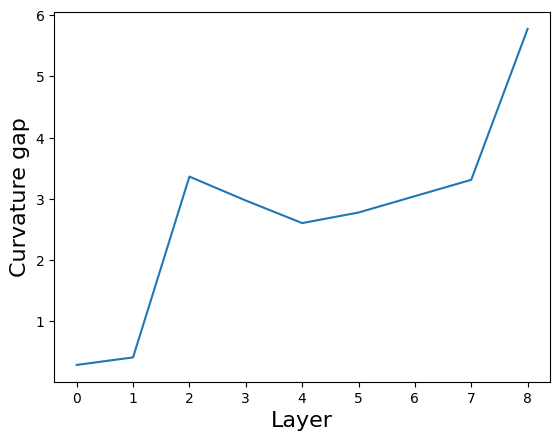

In [ ]:
# Plot result
plt.plot(np.arange(9), curvature_gaps_circles_filtered)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Curvature gap", fontsize=16)

# 2. Syn-II Dataset

## 2.1 Modularity and Normalized Cut

In [5]:
# Load datasets
X_train_4circles, y_train_4circles = DatasetFactory.make_4circles()
X_test_4circles, y_test_4circles = DatasetFactory.make_4circles()

# Calculate modularities and normalized cuts
modularities_4circles = []
norm_cuts_4circles = []
for k in tqdm(range(50)):
    # Initialize and train model
    model = DNN(input_dimension=2, hidden_units=150, depth=7)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_4circles,
        y_train=y_train_4circles,
        X_test=X_test_4circles,
        y_test=y_test_4circles,
        verbose=False
    )

    # Calculate modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_4circles.append(community_strucutre.modularity(X=X_test_4circles, y=y_test_4circles,k=100))
    norm_cuts_4circles.append(community_strucutre.normalized_cut(X=X_test_4circles, y=y_test_4circles, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
# Results modularity
modularities_4circles = np.array(modularities_4circles)  
avg_modularities_4circles = modularities_4circles.mean(axis=0) 
print(avg_modularities_4circles)

[0.05128931 0.05235185 0.06129318 0.14594289 0.22461013 0.23644735
 0.25182312 0.26085354 0.19420153]


In [7]:
# Results normalized cuts
norm_cuts_4circles = np.array(norm_cuts_4circles)  
avg_norm_cuts_4circles = norm_cuts_4circles.mean(axis=0) 
print(avg_norm_cuts_4circles)

[0.41063475 0.40884784 0.3936968  0.25158906 0.09513932 0.06914471
 0.05859089 0.0540566  0.0440621 ]


## 2.2 Curvature Gaps

In [ ]:
# Initialize and train model
model = DNN(input_dimension=2, hidden_units=100, depth=7)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_4circles,
    y_train=y_train_4circles,
    X_test=X_test_4circles,
    y_test=y_test_4circles,
    verbose=False
)

#Calculate curvature gap
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_4circles = community_strucutre.curvature_gap(X_test_4circles, y_test_4circles, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_4circles

[np.float32(0.86465394),
 np.float32(0.8448239),
 np.float32(0.67611057),
 np.float32(0.520446),
 np.float32(0.69259495),
 np.float32(0.6265867),
 np.float32(0.24998212),
 np.float32(0.12920319),
 np.float32(-0.38499796)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_4circles))).squeeze()
correct_mask = (y_test_4circles == y_pred)  

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_4circles_filtered = community_strucutre.curvature_gap(X_test_4circles[correct_mask], y_test_4circles[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_4circles_filtered

[np.float32(0.96081203),
 np.float32(0.9428647),
 np.float32(0.74499),
 np.float32(0.54378486),
 np.float32(1.333286),
 np.float32(1.193553),
 np.float32(1.299415),
 np.float32(1.5932451),
 np.float32(2.464522)]

Text(0, 0.5, 'Curvature Gap')

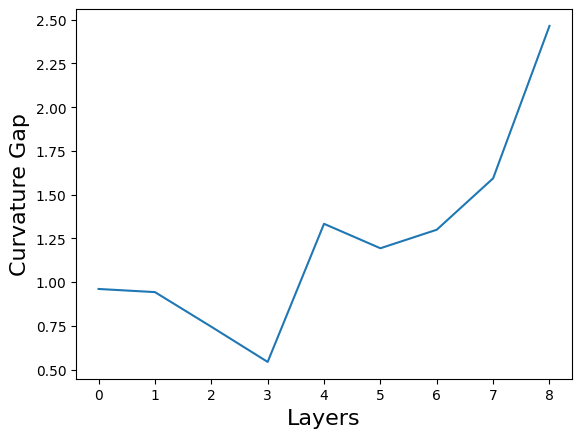

In [ ]:
# Plot result
plt.plot(np.arange(9), curvature_gaps_4circles_filtered)
plt.xlabel('Layers', fontsize=16)
plt.ylabel('Curvature Gap', fontsize=16)

# 3. Syn-III Dataset

## 3.1 Modularity and Normalized Cuts

In [8]:
# Load datasets 
X_train_cylinders, y_train_cylinders = DatasetFactory.make_cylinders()
X_test_cylinders, y_test_cylinders = DatasetFactory.make_cylinders()

# Calculate modularities and normalized cuts
modularities_cylinders = []
norm_cuts_cylinders = []
for k in tqdm(range(50)):
    # Initialize and train model
    model = DNN(input_dimension=3, hidden_units=25, depth=7)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_cylinders,
        y_train=y_train_cylinders,
        X_test=X_test_cylinders,
        y_test=y_test_cylinders,
        verbose=False
    )

    # Calculate modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_cylinders.append(community_strucutre.modularity(X=X_test_cylinders, y=y_test_cylinders,k=100))
    norm_cuts_cylinders.append(community_strucutre.normalized_cut(X=X_test_cylinders, y=y_test_cylinders, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
# Results modularities
modularities_cylinders = np.array(modularities_cylinders)  
avg_modularities_cylinders = modularities_cylinders.mean(axis=0) 
print(avg_modularities_cylinders)

[0.03344559 0.04970362 0.19454204 0.39350866 0.44028199 0.45074976
 0.45522937 0.45606381 0.45754874]


In [10]:
# Results normalized cuts
norm_cuts_cylinders = np.array(norm_cuts_cylinders)  
avg_norm_cuts_cylinders = norm_cuts_cylinders.mean(axis=0) 
print(avg_norm_cuts_cylinders)

[0.46652275 0.45022974 0.30514867 0.10644652 0.05964679 0.04896648
 0.04419376 0.04352667 0.03934963]


## 3.2 Curvature Gap

In [ ]:
# Initialize and train models
model = DNN(input_dimension=3, hidden_units=25, depth=7)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_cylinders,
    y_train=y_train_cylinders,
    X_test=X_test_cylinders,
    y_test=y_test_cylinders,
    verbose=False
)

# Compute curvature gap
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_cylinders = community_strucutre.curvature_gap(X_test_cylinders, y_test_cylinders, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_cylinders

[np.float32(-0.16894093),
 np.float32(-0.089862056),
 np.float32(0.8820851),
 np.float32(0.58732206),
 np.float32(0.24187993),
 np.float32(0.19343138),
 np.float32(0.024833295),
 np.float32(0.12942538),
 np.float32(0.20528542)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_cylinders))).squeeze()
correct_mask = (y_test_cylinders == y_pred)  

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_cylinders_filtered = community_strucutre.curvature_gap(X_test_cylinders[correct_mask], y_test_cylinders[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_cylinders_filtered

[np.float32(-0.17668353),
 np.float32(-0.09166877),
 np.float32(0.9653981),
 np.float32(0.78175133),
 np.float32(0.6801966),
 np.float32(0.7987587),
 np.float32(0.42344093),
 np.float32(1.1476926),
 np.float32(4.3803983)]

Text(0, 0.5, 'Curvature Gap')

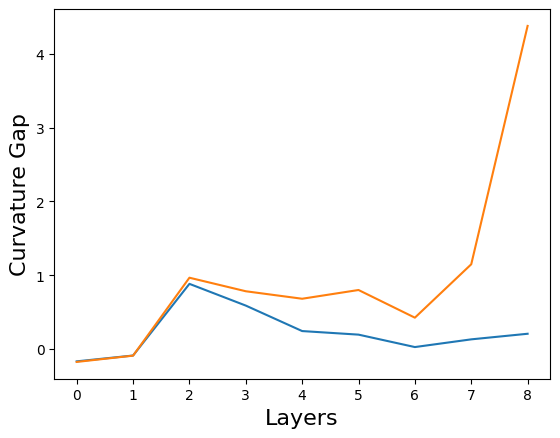

In [ ]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_cylinders)
plt.plot(np.arange(9), curvature_gaps_cylinders_filtered)
plt.xlabel('Layers', fontsize=16)
plt.ylabel('Curvature Gap', fontsize=16)

# 4. Syn-IV Dataset

## 4.1 Modularity and Normalized Cut

In [11]:
# Load datasets
X_train_tori, y_train_tori = DatasetFactory.make_cylinders()
X_test_tori, y_test_tori = DatasetFactory.make_cylinders()

# Calculate modularities and normalized cuts
modularities_tori = []
norm_cuts_tori = []
for k in tqdm(range(50)):
    # Initialize and train model
    model = DNN(input_dimension=3, hidden_units=25, depth=7)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_tori,
        y_train=y_train_tori,
        X_test=X_test_tori,
        y_test=y_test_tori,
        verbose=False
    )
    # Calculate modularity and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_tori.append(community_strucutre.modularity(X=X_test_tori, y=y_test_tori,k=100))
    norm_cuts_tori.append(community_strucutre.normalized_cut(X=X_test_tori, y=y_test_tori, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
# Results modularities
modularities_tori = np.array(modularities_tori)  
avg_modularities_tori = modularities_tori.mean(axis=0) 
print(avg_modularities_tori)

[0.03132023 0.04583242 0.17953642 0.38931124 0.43997628 0.4501116
 0.45429853 0.45509879 0.45575386]


In [13]:
# Results normalized cuts
norm_cuts_tori = np.array(norm_cuts_tori)  
avg_norm_cuts_tori = norm_cuts_tori.mean(axis=0) 
print(avg_norm_cuts_tori)

[0.46865748 0.45412045 0.32022449 0.11065599 0.0599853  0.04971244
 0.04513326 0.04444217 0.0410946 ]


## 4.2 Curvature Gap

In [ ]:
# Initialize and train models
model = DNN(input_dimension=3, hidden_units=25, depth=7)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_tori,
    y_train=y_train_tori,
    X_test=X_test_tori,
    y_test=y_test_tori,
    verbose=False
)

# Calculate curvature gaps
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_tori = community_strucutre.curvature_gap(X_test_tori, y_test_tori, curv="Approx-Ollivier-Ricci", k=100)
curvature_gaps_tori

[np.float32(2.2444842),
 np.float32(2.0238981),
 np.float32(1.5797509),
 np.float32(1.5919683),
 np.float32(1.1950257),
 np.float32(1.3078911),
 np.float32(1.1631918),
 np.float32(1.1522595),
 np.float32(0.23627354)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_tori))).squeeze()
correct_mask = (y_test_tori == y_pred)  

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_tori_filtered = community_strucutre.curvature_gap(X_test_tori[correct_mask], y_test_tori[correct_mask], curv="Approx-Ollivier-Ricci", k=100)
curvature_gaps_tori_filtered

[np.float32(2.3880558),
 np.float32(2.114245),
 np.float32(1.6128665),
 np.float32(1.7301031),
 np.float32(1.4608425),
 np.float32(1.7144452),
 np.float32(1.5976452),
 np.float32(2.0196278),
 np.float32(4.1412683)]

Text(0, 0.5, 'Curvature Gap')

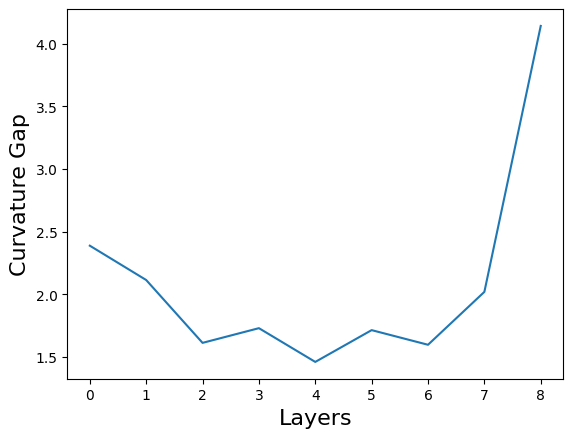

In [ ]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_tori_filtered)
plt.xlabel('Layers', fontsize=16)
plt.ylabel('Curvature Gap', fontsize=16)

# 5. MNIST Dataset

## 5.1 MNIST 1 vs. 7

### 5.1.1 Modularity and Normalized Cuts

In [14]:
# Load data
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7))


# Calculate modularities and normalized cuts
modularities_MNIST_1v7 = []
norm_cuts_MNIST_1v7 = []
for k in tqdm(range(50)):
    # Initialize and train models
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_MNIST_17,
        y_train=y_train_MNIST_17,
        X_test=X_test_MNIST_17,
        y_test=y_test_MNIST_17,
        verbose=False
    )

    # Compute modularity and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_MNIST_1v7.append(community_strucutre.modularity(X=X_test_MNIST_17, y=y_test_MNIST_17,k=100))
    norm_cuts_MNIST_1v7.append(community_strucutre.normalized_cut(X=X_test_MNIST_17, y=y_test_MNIST_17, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
# Results modularity
modularities_MNIST_1v7 = np.array(modularities_MNIST_1v7)  
avg_modularities_MNIST_1v7 = modularities_MNIST_1v7.mean(axis=0) 
print(avg_modularities_MNIST_1v7)

[0.39025696 0.46373756 0.46487546 0.46849277 0.47352247 0.47878764
 0.48429925 0.48834058 0.48996257]


In [16]:
# Results normalized cuts
norm_cuts_MNIST_1v7 = np.array(norm_cuts_MNIST_1v7)  
avg_norm_cuts_MNIST_1v7 = norm_cuts_MNIST_1v7.mean(axis=0) 
print(avg_norm_cuts_MNIST_1v7)

[0.10939491 0.03614993 0.03503177 0.03139903 0.02636004 0.02109448
 0.01557456 0.01149113 0.00771227]


### 5.1.2 Curvature Gap

In [ ]:
# Initialize and train models
model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_MNIST_17,
    y_train=y_train_MNIST_17,
    X_test=X_test_MNIST_17,
    y_test=y_test_MNIST_17,
    verbose=False
)

# Calculate curvature gap
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_MNIST_17 = community_strucutre.curvature_gap(X_test_MNIST_17, y_test_MNIST_17, curv="Ollivier-Ricci", k=50)
curvature_gaps_MNIST_17

[np.float32(0.8742179),
 np.float32(1.2014596),
 np.float32(1.1275057),
 np.float32(1.0812403),
 np.float32(1.0991983),
 np.float32(1.0373775),
 np.float32(1.0027531),
 np.float32(0.7869597),
 np.float32(-0.7802276)]

In [ ]:
# Filter out misclassified points
y_pred = torch.round(torch.sigmoid(model.forward(X_test_MNIST_17))).squeeze()
correct_mask = (y_test_MNIST_17 == y_pred) 

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_MNIST_17_filtered = community_strucutre.curvature_gap(X_test_MNIST_17[correct_mask], y_test_MNIST_17[correct_mask], curv="Ollivier-Ricci", k=50)
curvature_gaps_MNIST_17_filtered

/Users/moritzhehl/Local/Current Projects/Ricci Flow/GitHub_Code/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/moritzhehl/Local/Current Projects/Ricci Flow/GitHub_Code/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/moritzhehl/Local/Current Projects/Ricci Flow/GitHub_Code/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/moritzhehl/Local/Current Projects/Ricci Flow/GitHub_Code/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/moritzhehl/Local/Current Projects/Ricci Flow/GitHub_Code/.venv/lib/python3.11

[np.float32(0.91311765),
 np.float32(1.6265615),
 np.float32(1.7531897),
 np.float32(1.7909241),
 np.float32(1.9952067),
 np.float32(2.3704362),
 np.float32(2.9549518),
 np.float32(4.967527),
 np.float64(nan)]

No inter-community edges in final layer!

Text(0, 0.5, 'Curvature Gap')

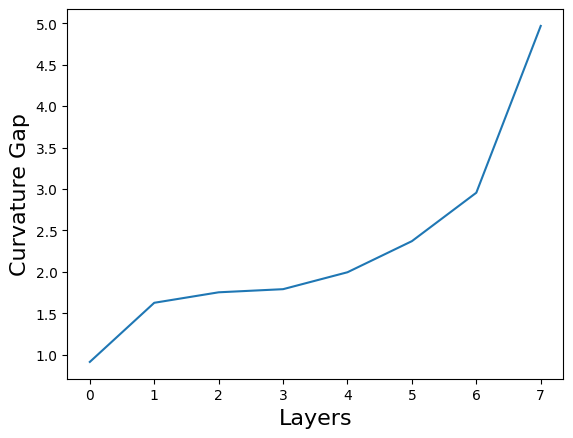

In [ ]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_MNIST_17_filtered)
plt.xlabel('Layers', fontsize=16)
plt.ylabel('Curvature Gap', fontsize=16)

### 5.1.3 Curvature distribution

In [ ]:
# Initialize and train models
model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_MNIST_17,
    y_train=y_train_MNIST_17,
    X_test=X_test_MNIST_17,
    y_test=y_test_MNIST_17,
    verbose=True
)

# Calculate Ricci curvature distribution of inter- and intra-community edges
community_strucutre = CommunityStructure(NN=model)
within_curvature_distributions, between_curvature_distributions = community_strucutre.ricci_curvature_distribution(X=X_test_MNIST_17, y=y_test_MNIST_17, curv='Ollivier-Ricci', k=50)
print("Step 1")

# Calculate Ricci curvature distribution of inter- and intra-community edges only considering correctly classified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_MNIST_17))).squeeze()
correct_mask = (y_test_MNIST_17 == y_pred) 
within_curvature_distributions_filtered, between_curvature_distributions_filtered = community_strucutre.ricci_curvature_distribution(X=X_test_MNIST_17[correct_mask], y=y_test_MNIST_17[correct_mask], curv='Ollivier-Ricci', k=50)

Training finished | Epochs: 297 | Train acc: 100.00% | Test acc: 99.40%
Step 1


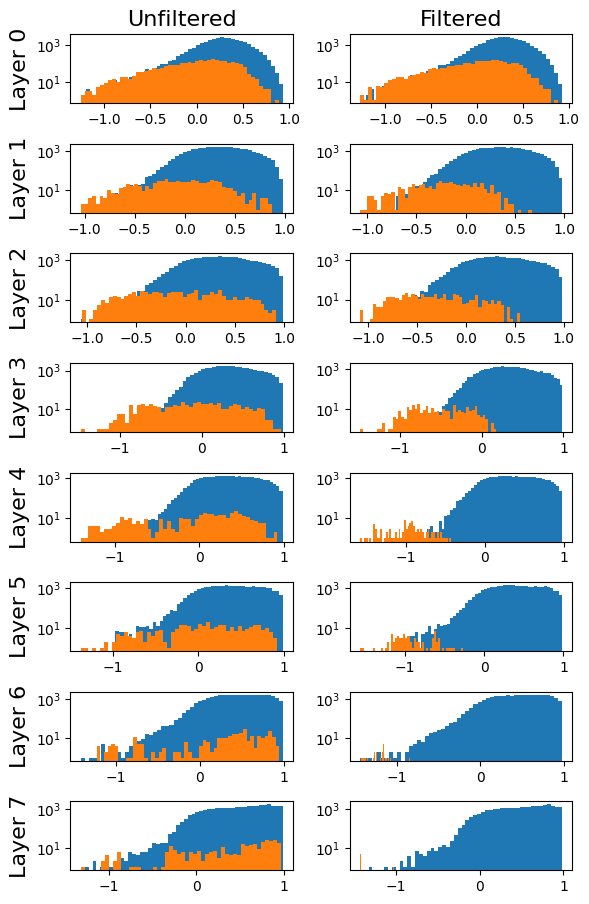

In [ ]:
# Plot results
plt.figure(figsize=(6,10))
for i in range(len(within_curvature_distributions)-1):
    plt.subplot(len(within_curvature_distributions),2,2*i+1)
    if i==0:
        plt.title("Unfiltered", fontsize=16)
    plt.hist(within_curvature_distributions[i], bins=50, log=True)
    plt.hist(between_curvature_distributions[i], bins=50, log=True)
    plt.ylabel(f"Layer {i}", fontsize=16)
    plt.subplot(len(within_curvature_distributions),2,2*i+2)
    if i==0:
        plt.title("Filtered", fontsize=16)
    plt.hist(within_curvature_distributions_filtered[i], bins=50, log=True)
    plt.hist(between_curvature_distributions_filtered[i], bins=50, log=True)
plt.tight_layout()
plt.savefig("../plots/curvature_distribution.png", bbox_inches="tight", dpi=300)

## 5.2 MNIST 6 vs. 9

### 5.2.1 Modularity and Normalized Cut

In [17]:
# Load data
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9))

# Calculate modularities and normalized cuts
modularities_MNIST_6v9 = []
norm_cuts_MNIST_6v9 = []
for k in tqdm(range(50)):
    # Initialize and train networks
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_MNIST_69,
        y_train=y_train_MNIST_69,
        X_test=X_test_MNIST_69,
        y_test=y_test_MNIST_69,
        verbose=False
    )

    # Calculate modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_MNIST_6v9.append(community_strucutre.modularity(X=X_test_MNIST_69, y=y_test_MNIST_69,k=100))
    norm_cuts_MNIST_6v9.append(community_strucutre.normalized_cut(X=X_test_MNIST_69, y=y_test_MNIST_69, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
# Results modularities
modularities_MNIST_6v9 = np.array(modularities_MNIST_6v9)  
avg_modularities_MNIST_6v9 = modularities_MNIST_6v9.mean(axis=0) 
print(avg_modularities_MNIST_6v9)

[0.44755906 0.48431281 0.48478565 0.48481047 0.48562273 0.4872537
 0.48912447 0.49080691 0.49231746]


In [20]:
# Results normalized cuts
norm_cuts_MNIST_6v9 = np.array(norm_cuts_MNIST_6v9)  
avg_norm_cuts_MNIST_6v9 = norm_cuts_MNIST_6v9.mean(axis=0) 
print(avg_norm_cuts_MNIST_6v9)

[0.05206779 0.01566192 0.01518776 0.01515008 0.01433508 0.01271332
 0.01085265 0.00917737 0.00620646]


### 5.2.2 Curvature Gaps

In [ ]:
# Initialize and train models
model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_MNIST_69,
    y_train=y_train_MNIST_69,
    X_test=X_test_MNIST_69,
    y_test=y_test_MNIST_69,
    verbose=False
)

# Calculate curvature gaps
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_MNIST_69 = community_strucutre.curvature_gap(X_test_MNIST_69, y_test_MNIST_69, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_MNIST_69

[np.float32(1.7956492),
 np.float32(1.2912923),
 np.float32(1.3436339),
 np.float32(1.2172725),
 np.float32(1.1493976),
 np.float32(0.99723375),
 np.float32(0.7279961),
 np.float32(0.74929476),
 np.float32(-0.36681852)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_MNIST_69))).squeeze()
correct_mask = (y_test_MNIST_69 == y_pred)  

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_MNIST_69_filtered = community_strucutre.curvature_gap(X_test_MNIST_69[correct_mask], y_test_MNIST_69[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_MNIST_69_filtered

[np.float32(2.089173),
 np.float32(2.4507592),
 np.float32(2.4593766),
 np.float32(2.1584582),
 np.float32(2.214859),
 np.float32(2.052764),
 np.float32(2.7220786),
 np.float32(2.6466334),
 np.float32(6.9581003)]

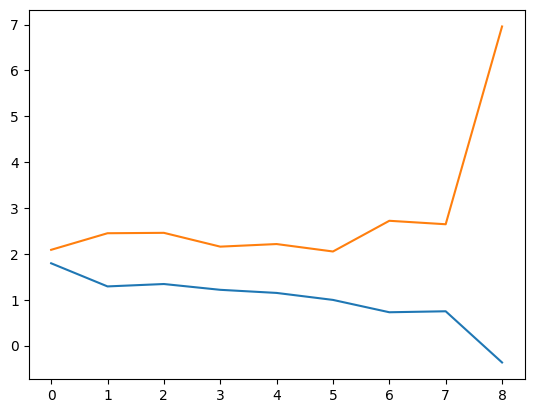

In [ ]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_MNIST_69)
plt.plot(np.arange(9), curvature_gaps_MNIST_69_filtered)

# 6. Fashion MNIST

## 6.1 Fashion MNIST Shoes

### 6.1.1 Modularity and Normalized Cuts

In [ ]:
# Load data
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST((5,7), device='cpu')

# Calculate modularities and normalized cuts
modularities_fMNIST_shoes = []
norm_cuts_fMNIST_shoes = []
for k in tqdm(range(50)):
    # Initialize and train models
    model = DNN(input_dimension=784, hidden_units=50, depth=7, vision_model=True)
    train_model(
        threshold_accuracy=100,
        model=model,
        X_train=X_train_fMNIST_shoes,
        y_train=y_train_fMNIST_shoes,
        X_test=X_test_fMNIST_shoes,
        y_test=y_test_fMNIST_shoes,
        verbose=False
    )

    # Calculate modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_fMNIST_shoes.append(community_strucutre.modularity(X=X_test_fMNIST_shoes, y=y_test_fMNIST_shoes,k=100))
    norm_cuts_fMNIST_shoes.append(community_strucutre.normalized_cut(X=X_test_fMNIST_shoes, y=y_test_fMNIST_shoes, k=100))

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Results modularities
modularities_fMNIST_shoes = np.array(modularities_fMNIST_shoes)  
avg_modularities_fMNIST_shoes = modularities_fMNIST_shoes.mean(axis=0) 
print(avg_modularities_fMNIST_shoes)

array([0.21576774, 0.30463194, 0.3824755 , 0.41955463, 0.44196694,
       0.45351393, 0.4571771 , 0.45668533, 0.45832005])

In [ ]:
# Results normalized cuts
norm_cuts_fMNIST_shoes = np.array(norm_cuts_fMNIST_shoes)  
avg_norm_cuts_fMNIST_shoes = norm_cuts_fMNIST_shoes.mean(axis=0) 
print(avg_norm_cuts_fMNIST_shoes)

array([0.280995  , 0.19498807, 0.11748827, 0.08041593, 0.05796535,
       0.04637507, 0.04264751, 0.04319454, 0.03967583])

### 6.1.2 Curvature Gaps

In [ ]:
# Load data
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST((5,7), device='cpu')

# Initialize and train models
model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
train_model(
    threshold_accuracy=100,
    model=model,
    X_train=X_train_fMNIST_shoes,
    y_train=y_train_fMNIST_shoes,
    X_test=X_test_fMNIST_shoes,
    y_test=y_test_fMNIST_shoes,
    verbose=False
)

# Compute curvature gaps
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_fMNIST_shoes = community_strucutre.curvature_gap(X_test_fMNIST_shoes, y_test_fMNIST_shoes, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_fMNIST_shoes

[np.float32(0.83497643),
 np.float32(0.47808877),
 np.float32(0.54519314),
 np.float32(0.59388226),
 np.float32(0.63268214),
 np.float32(0.56527525),
 np.float32(0.41416636),
 np.float32(0.54203767),
 np.float32(-0.7265949)]

In [ ]:
# Filter out misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_fMNIST_shoes))).squeeze()
correct_mask = (y_test_fMNIST_shoes == y_pred) 

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_fMNIST_shoes_filtered = community_strucutre.curvature_gap(X_test_fMNIST_shoes[correct_mask], y_test_fMNIST_shoes[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_fMNIST_shoes_filtered

[np.float32(0.90210634),
 np.float32(0.53398174),
 np.float32(0.6076528),
 np.float32(0.74777055),
 np.float32(0.94347876),
 np.float32(1.2124194),
 np.float32(1.3465968),
 np.float32(1.6066712),
 np.float32(3.4325638)]

Text(0, 0.5, 'Curvature Gap')

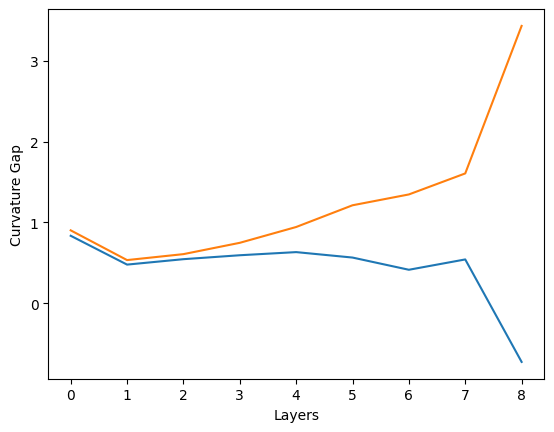

In [ ]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_fMNIST_shoes, label="Unfiltered")
plt.plot(np.arange(9), curvature_gaps_fMNIST_shoes_filtered, label="Filtered")
plt.xlabel("Layers")
plt.ylabel("Curvature Gap")

## 6.2 Fashion MNIST Apperal

### 6.1.2 Modularity and Normalized Cuts

In [ ]:
# Load data
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device='cpu')

# Compute modularities and normalized cuts
modularities_fMNIST_apperal = []
norm_cuts_fMNIST_apperal = []
for k in tqdm(range(10)):
    # Initialize and train models
    model = DNN(input_dimension=784, hidden_units=150, depth=7, vision_model=True)
    train_model(
        threshold_accuracy=99,
        model=model,
        X_train=X_train_fMNIST_apperal,
        y_train=y_train_fMNIST_apperal,
        X_test=X_test_fMNIST_apperal,
        y_test=y_test_fMNIST_apperal,
        verbose=False
    )

    # Compute modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_fMNIST_apperal.append(community_strucutre.modularity(X=X_test_fMNIST_apperal, y=y_test_fMNIST_apperal,k=100))
    norm_cuts_fMNIST_apperal.append(community_strucutre.normalized_cut(X=X_test_fMNIST_apperal, y=y_test_fMNIST_apperal, k=100))

100%|██████████| 10/10 [02:57<00:00, 17.73s/it]


In [ ]:
# Results modularities
modularities_fMNIST_apperal = np.array(modularities_fMNIST_apperal)  
avg_modularities_fMNIST_apperal = modularities_fMNIST_apperal.mean(axis=0) 
print(avg_modularities_fMNIST_apperal)

array([0.30191593, 0.33750688, 0.38964209, 0.40815107, 0.41424084,
       0.41685487, 0.41732825, 0.41702481, 0.41745666])

In [ ]:
# Results normalized cuts
norm_cuts_fMNIST_apperal = np.array(norm_cuts_fMNIST_apperal)  
avg_norm_cuts_fMNIST_apperal = norm_cuts_fMNIST_apperal.mean(axis=0) 
print(avg_norm_cuts_fMNIST_apperal)

array([0.1980032 , 0.16248212, 0.11030832, 0.09179134, 0.08564549,
       0.08297185, 0.08252705, 0.0829326 , 0.08086375])

### 6.2.2 Curvature Gaps

In [32]:
# Load data
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device='cpu')

# Initialize and train models
model = DNN(input_dimension=784, hidden_units=25, depth=7, vision_model=True)
train_model(
    threshold_accuracy=99,
    model=model,
    X_train=X_train_fMNIST_apperal,
    y_train=y_train_fMNIST_apperal,
    X_test=X_test_fMNIST_apperal,
    y_test=y_test_fMNIST_apperal,
    verbose=False
)

# Compute curvature gaps
community_strucutre = CommunityStructure(NN=model)
curvature_gaps_fMNIST_apperal = community_strucutre.curvature_gap(X_test_fMNIST_apperal, y_test_fMNIST_apperal, curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_fMNIST_apperal

[np.float32(0.5541837),
 np.float32(0.34765068),
 np.float32(0.4444557),
 np.float32(0.4924559),
 np.float32(0.314964),
 np.float32(0.27430257),
 np.float32(0.2402052),
 np.float32(0.16630432),
 np.float32(-0.07346906)]

In [33]:
# Exclude misclassified samples
y_pred = torch.round(torch.sigmoid(model.forward(X_test_fMNIST_apperal))).squeeze()
correct_mask = (y_test_fMNIST_apperal == y_pred) 

# Calculate curvature gaps only considering correctly classified samples
curvature_gaps_fMNIST_apperal_filtered = community_strucutre.curvature_gap(X_test_fMNIST_apperal[correct_mask], y_test_fMNIST_apperal[correct_mask], curv="Approx-Ollivier-Ricci", k=50)
curvature_gaps_fMNIST_apperal_filtered

[np.float32(0.68891996),
 np.float32(0.49240512),
 np.float32(0.69357157),
 np.float32(0.77957195),
 np.float32(0.7569894),
 np.float32(0.9638594),
 np.float32(1.0314323),
 np.float32(1.5371397),
 np.float32(3.9362395)]

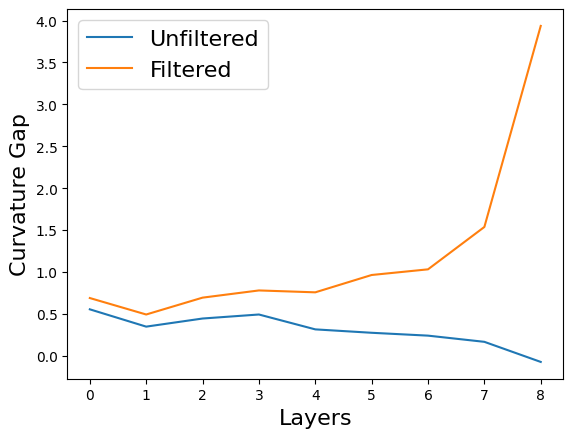

In [34]:
# Plot results
plt.plot(np.arange(9), curvature_gaps_fMNIST_apperal, label="Unfiltered")
plt.plot(np.arange(9), curvature_gaps_fMNIST_apperal_filtered, label="Filtered")
plt.xlabel("Layers", fontsize=16)
plt.ylabel("Curvature Gap", fontsize=16)
plt.legend(fontsize=16)

# CIFAR

In [ ]:
# Load data
X_train_CIFAR,y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1), device='cpu')

# Compute modularities and normalized cuts
modularities_CIFAR = []
norm_cuts_CIFAR = []
for k in tqdm(range(10)):
    # Initialize and train models
    model = DNN(input_dimension=3*32*32, hidden_units=150, depth=7, vision_model=True)
    train_model(
        threshold_accuracy=90,
        model=model,
        X_train=X_train_CIFAR,
        y_train=y_train_CIFAR,
        X_test=X_test_CIFAR,
        y_test=y_test_CIFAR,
        verbose=False
    )

    # Compute modularities and normalized cuts
    community_strucutre = CommunityStructure(NN=model)
    modularities_CIFAR.append(community_strucutre.modularity(X=X_test_CIFAR, y=y_test_CIFAR,k=100))
    norm_cuts_CIFAR.append(community_strucutre.normalized_cut(X=X_test_CIFAR, y=y_test_CIFAR, k=100))

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Results modularities
modularities_CIFAR = np.array(modularities_CIFAR)  
avg_modularities_CIFAR = modularities_CIFAR.mean(axis=0) 
print(avg_modularities_fMNIST_shoes)

array([0.21576774, 0.30463194, 0.3824755 , 0.41955463, 0.44196694,
       0.45351393, 0.4571771 , 0.45668533, 0.45832005])

In [ ]:
# Results normalized cuts
norm_cuts_CIFAR = np.array(norm_cuts_CIFAR)  
avg_norm_cuts_CIFAR = norm_cuts_CIFAR.mean(axis=0) 
print(avg_norm_cuts_CIFAR)

array([0.42015906, 0.27311   , 0.23042614, 0.19892341, 0.18583305,
       0.18174229, 0.17982683, 0.17745146, 0.17355505])

# Plots

In this section, we create plots of the results in the earlier experiments.

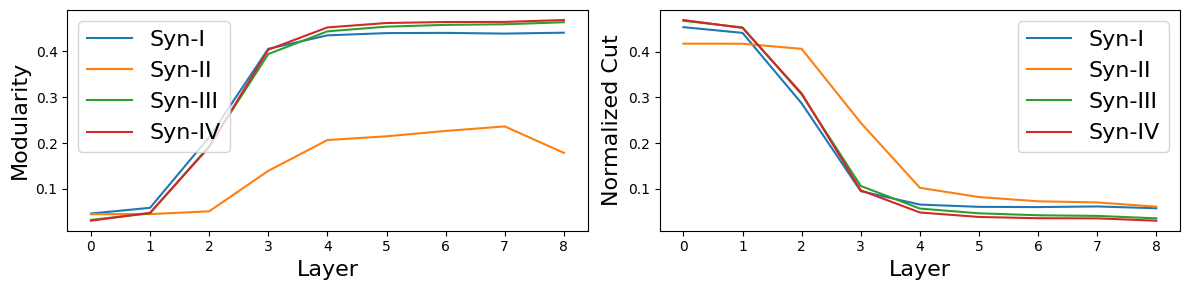

In [91]:
plt.figure(figsize=(12,3))
# plt.suptitle("Synthetic Datasets", fontsize=20)

plt.subplot(1,2,1)
plt.plot(np.arange(0,9), avg_modularities_circles, label="Syn-I")
plt.plot(np.arange(0,9), avg_modularities_4circles, label="Syn-II")
plt.plot(np.arange(0,9), avg_modularities_cylinders, label="Syn-III")
plt.plot(np.arange(0,9), avg_modularities_tori, label="Syn-IV")
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Modularity", fontsize=16)
#plt.title("Modularity", fontsize=16)
plt.legend(fontsize=16, loc="upper left")

plt.subplot(1,2,2)
plt.plot(np.arange(0,9), avg_norm_cuts_circles, label="Syn-I")
plt.plot(np.arange(0,9), avg_norm_cuts_4circles, label="Syn-II")
plt.plot(np.arange(0,9), avg_norm_cuts_cylinders, label="Syn-III")
plt.plot(np.arange(0,9), avg_norm_cuts_tori, label="Syn-IV")
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Normalized Cut", fontsize=16)
#plt.title("Normalized Cut", fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("../plots/community_structure_synthetic_data.png", dpi=300, bbox_inches="tight")

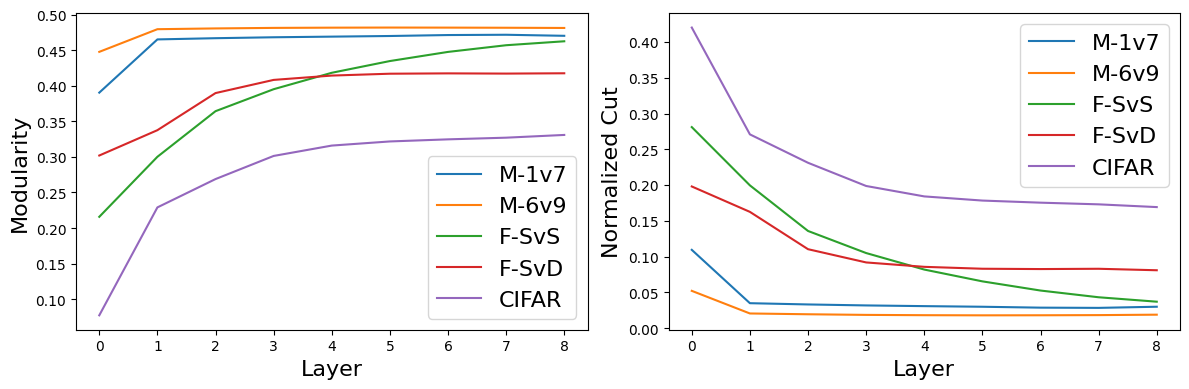

In [79]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(np.arange(0,9), avg_modularities_MNIST_1v7, label="M-1v7")
plt.plot(np.arange(0,9), avg_modularities_MNIST_6v9, label="M-6v9")
plt.plot(np.arange(0,9), avg_modularities_fMNIST_shoes, label="F-SvS")
plt.plot(np.arange(0,9), avg_modularities_fMNIST_apperal, label="F-SvD")
plt.plot(np.arange(0,9), avg_modularities_CIFAR, label="CIFAR")
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Modularity", fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
plt.plot(np.arange(0,9), avg_norm_cuts_MNIST_1v7, label="M-1v7")
plt.plot(np.arange(0,9), avg_norm_cuts_MNIST_6v9, label="M-6v9")
plt.plot(np.arange(0,9), avg_norm_cuts_fMNIST_shoes, label="F-SvS")
plt.plot(np.arange(0,9), avg_norm_cuts_fMNIST_apperal, label="F-SvD")
plt.plot(np.arange(0,9), avg_norm_cuts_CIFAR, label="CIFAR")
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Normalized Cut", fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("../plots/community_structure_real_data.png", dpi=300, bbox_inches="tight")

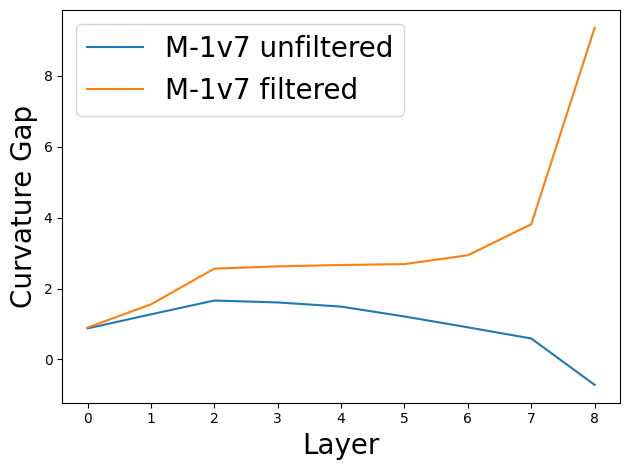

In [97]:
#plt.figure(figsize=(5,5))
plt.plot(np.arange(9), curvature_gaps_MNIST_17, label="M-1v7 unfiltered")
plt.plot(np.arange(9), curvature_gaps_MNIST_17_filtered, label="M-1v7 filtered")
plt.legend(fontsize=20)
plt.xlabel("Layer", fontsize=20)
plt.ylabel("Curvature Gap", fontsize=20)
plt.tight_layout()
plt.savefig("../plots/curvature_gap.png", bbox_inches="tight", dpi=300)